# EDA for Hindi Dataset
### Data flow 
       Raw_Audio -> Noise_Reduction -> Converting to Mono Channel -> Applying VAD - > Extracting Mfcc's

## 1. Analyzing the sound Sample and its Charecterstics

In [13]:
import os
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Get the current working directory
cwd = os.getcwd()

# Go one folder back
parent_dir = os.path.dirname(cwd)

# Specify the relative path to the audio file from the parent directory
relative_path = r"Dataset\HindiDigits\1_04.wav"

# Construct the absolute file path
audio_file = os.path.join(parent_dir, relative_path)

# Check if the file exists
if os.path.exists(audio_file):
    print("Audio file exists at:", audio_file)
else:
    print("Audio file does not exist.")

# Load the audio file
y, samrate = librosa.load(audio_file)

# Print the sampling rate
print("Sampling rate:", samrate)



Audio file exists at: c:\Users\Rashaad Ali Baig\CS361\CS361-Course-Project\Dataset\HindiDigits\1_04.wav
Sampling rate: 22050


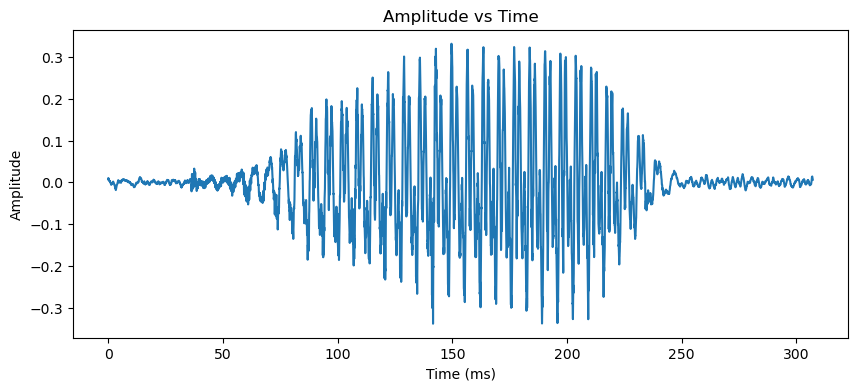

In [14]:
# Calculate the time array
time = librosa.times_like(y, sr=samrate)

# Plot the amplitude vs time
plt.figure(figsize=(10, 4))
plt.plot(2*time, y)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Time')
plt.show()

44100
Duration of the audio file: 0.3 seconds


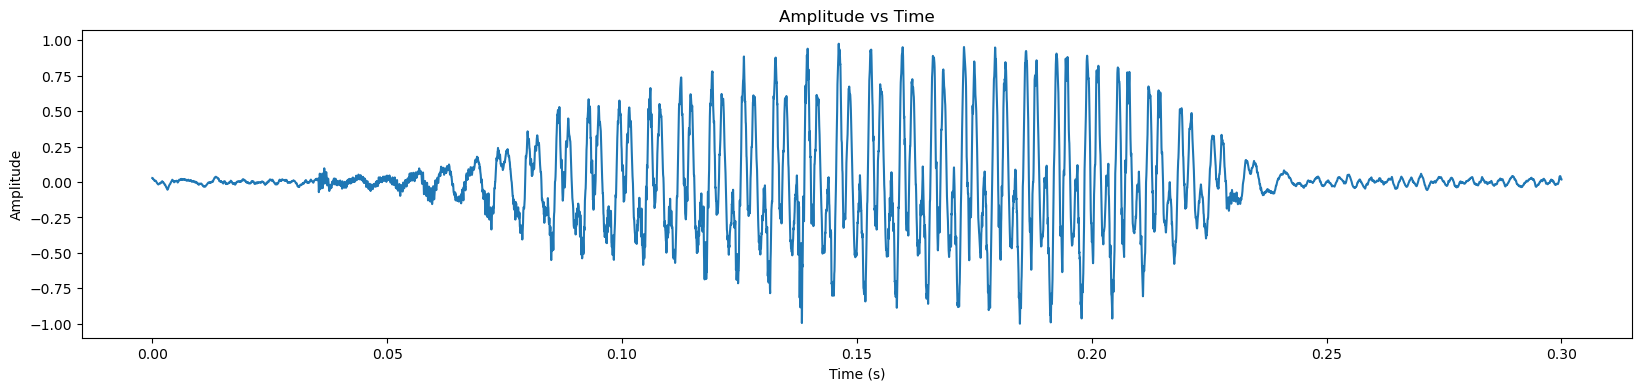

In [15]:
sr, y = wavfile.read(audio_file)
print(sr)
# Convert to float and normalize to range [-1, 1]
y = y.astype(np.float32) / np.max(np.abs(y))

# Calculate the duration of the audio file
duration = len(y) / sr

print("Duration of the audio file:", duration, "seconds")

# Calculate the time array
time = np.linspace(0, duration, len(y))

# Plot the amplitude vs time
plt.figure(figsize=(20, 4))
plt.plot(time, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Time')
plt.show()


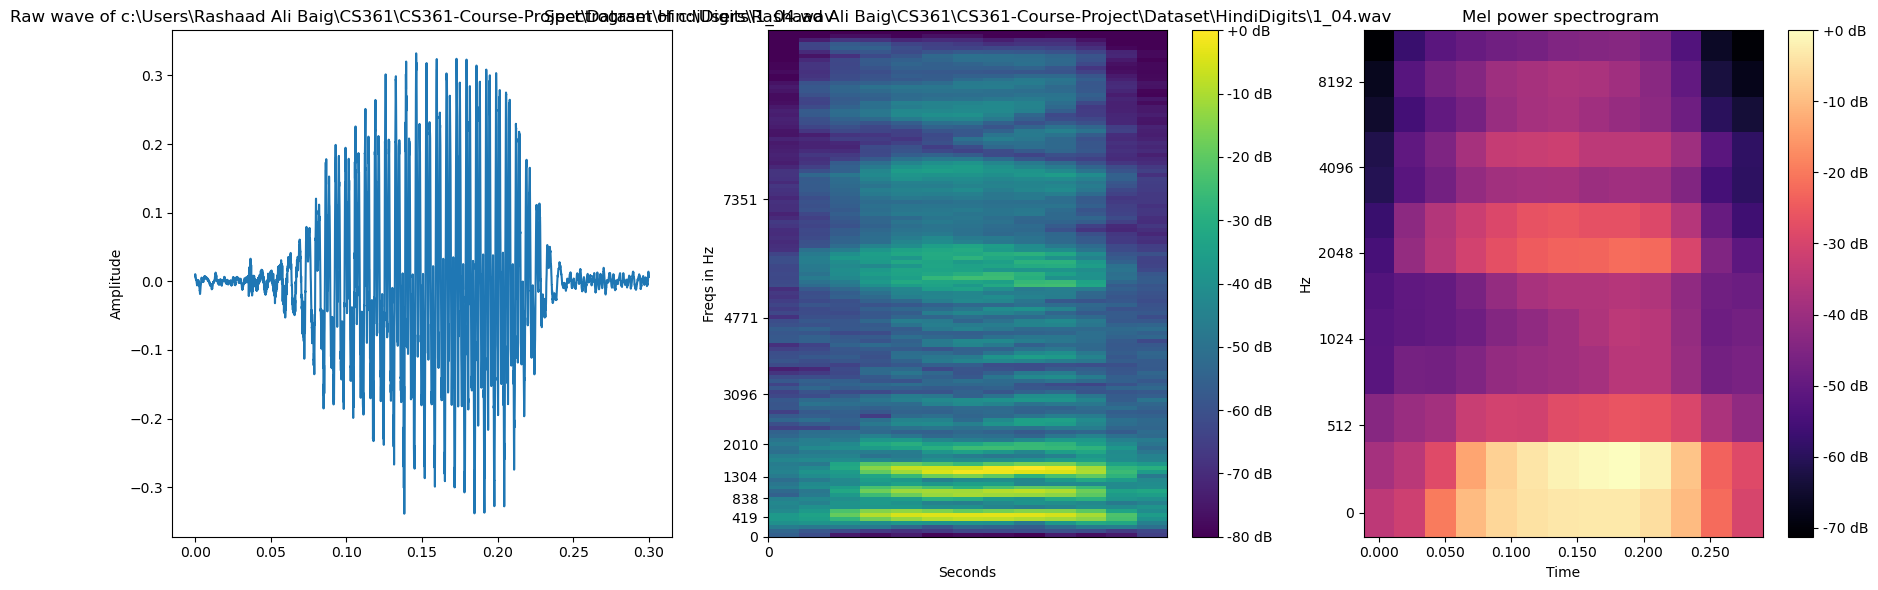

In [16]:

# Load the audio file
y, sample_rate = librosa.load(audio_file)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate)

# Convert to decibel units
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Get the corresponding frequencies and times
n_mels = spectrogram.shape[0]
freqs = librosa.core.mel_frequencies(n_mels=n_mels)

# Calculate the times array
times = librosa.times_like(spectrogram_db, sr=sample_rate)

# Plotting
plt.figure(figsize=(18, 6))

# Plot 1: Raw wave
plt.subplot(131)
plt.title('Raw wave of ' + audio_file)
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, len(y) / sample_rate, len(y)), y)

# Plot 2: Spectrogram
plt.subplot(132)
plt.imshow(spectrogram_db, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
plt.yticks(freqs[::16])
plt.xticks(times[::16])
plt.title('Spectrogram of ' + audio_file)
plt.ylabel('Freqs in Hz')
plt.xlabel('Seconds')
plt.colorbar(format='%+2.0f dB')

# Plot 3: Mel power spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=13)
log_S = librosa.power_to_db(S, ref=np.max)

plt.subplot(133)
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')

plt.tight_layout()
plt.show()


In [17]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Load the audio file
audio_file = '/kaggle/input/hindidigits-single/working/10_19.wav'
y, sample_rate = librosa.load(audio_file)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate)

# Convert to decibel units
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Get the corresponding frequencies and times
n_mels = spectrogram.shape[0]
freqs = librosa.core.mel_frequencies(n_mels=n_mels)

# Calculate the times array
times = librosa.times_like(spectrogram_db, sr=sample_rate)

# Plotting
plt.figure(figsize=(18, 6))


# Plot 3: Mel power spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=13)
log_S = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()


C:\Users\Rashaad Ali Baig\AppData\Local\Temp\ipykernel_18844\998549183.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sample_rate = librosa.load(audio_file)
c:\Users\Public\anaconda3\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/hindidigits-single/working/10_19.wav'

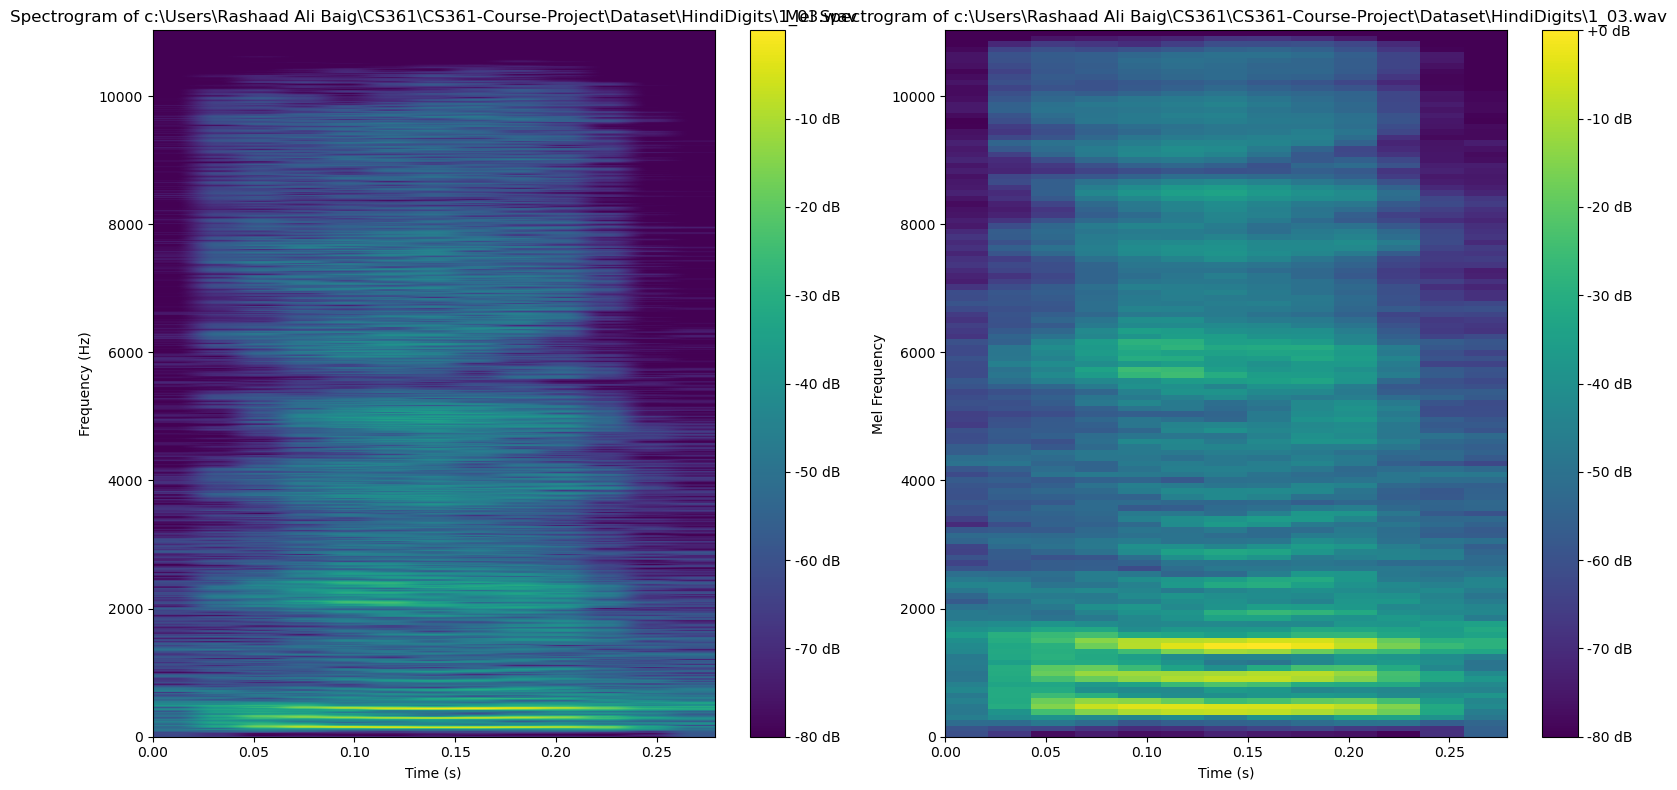

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
# audio_file = '/kaggle/input/hindidigits-single/working/10_19.wav'
y, sample_rate = librosa.load(audio_file)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate)

# Convert to decibel units
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Compute the regular spectrogram
S = np.abs(librosa.stft(y))

# Convert to decibel scale
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Get the corresponding frequencies and times for the regular spectrogram
freqs_s = librosa.fft_frequencies(sr=sample_rate)
times_s = librosa.times_like(S_db, sr=sample_rate)

# Get the corresponding frequencies and times for the mel spectrogram
n_mels = spectrogram.shape[0]
freqs_m = librosa.core.mel_frequencies(n_mels=n_mels, fmin=0, fmax=sample_rate/2)
times_m = librosa.times_like(spectrogram_db, sr=sample_rate)

# Plotting
plt.figure(figsize=(16, 8))

# Plot regular spectrogram
plt.subplot(1, 2, 1)
plt.imshow(S_db, aspect='auto', origin='lower', 
           extent=[times_s.min(), times_s.max(), freqs_s.min(), freqs_s.max()])
plt.title('Spectrogram of ' + audio_file)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(format='%+2.0f dB')

# Plot mel spectrogram
plt.subplot(1, 2, 2)
plt.imshow(spectrogram_db, aspect='auto', origin='lower', 
           extent=[times_m.min(), times_m.max(), freqs_m.min(), freqs_m.max()])
plt.title('Mel Spectrogram of ' + audio_file)
plt.ylabel('Mel Frequency')
plt.xlabel('Time (s)')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

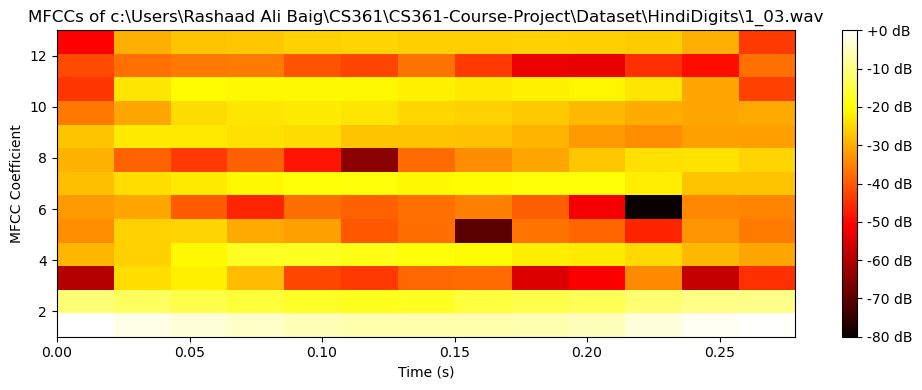

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
# audio_file = '/kaggle/input/hindidigits-single/working/10_19.wav'
y, sample_rate = librosa.load(audio_file)

# Compute the MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=13)

# Convert MFCCs to dB scale
mfccs_db = librosa.amplitude_to_db(mfccs, ref=np.max)

# Get the corresponding times
times = librosa.times_like(mfccs_db, sr=sample_rate)

# Plotting
plt.figure(figsize=(10, 4))

# Plot MFCCs with 'hot' color scheme
plt.imshow(mfccs_db, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), 1, 13], cmap='hot')
plt.title('MFCCs of ' + audio_file)
plt.ylabel('MFCC Coefficient')
plt.xlabel('Time (s)')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()
